In [ ]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/5Animal'

Mounted at /content/drive


In [41]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    class_mode='categorical',
    shuffle = True,
    subset='validation')

Found 1184 images belonging to 5 classes.
Found 130 images belonging to 5 classes.


In [42]:
VGG16_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in VGG16_model.layers:
  layer.trainable=False

model = Sequential([
    VGG16_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')])

In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [44]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
early_stop = EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [46]:
epochs = 35

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[early_stop],
    validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 686s 19s/step - accuracy: 0.3461 - loss: 1.5541 - val_accuracy: 0.6077 - val_loss: 1.2086
Epoch 2/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 670s 18s/step - accuracy: 0.5396 - loss: 1.2114 - val_accuracy: 0.7154 - val_loss: 1.0037
Epoch 3/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 683s 18s/step - accuracy: 0.6693 - loss: 0.9950 - val_accuracy: 0.7692 - val_loss: 0.8728
Epoch 4/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 665s 18s/step - accuracy: 0.7652 - loss: 0.7997 - val_accuracy: 0.7538 - val_loss: 0.7643
Epoch 5/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 669s 18s/step - accuracy: 0.8062 - loss: 0.6757 - val_accuracy: 0.7769 - val_loss: 0.6835
Epoch 6/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 668s 18s/step - accuracy: 0.7726 - loss: 0.6594 - val_accuracy: 0.8077 - val_loss: 0.6347
Epoch 7/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 671s 18s/step - accuracy: 0.8117 - loss: 0.5825 - val_accuracy: 0.8231 - val_loss: 0.6072
Epoch 8/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 669s 18s/step - accuracy: 0.8171 - loss: 0.5448 - val_accuracy: 0.

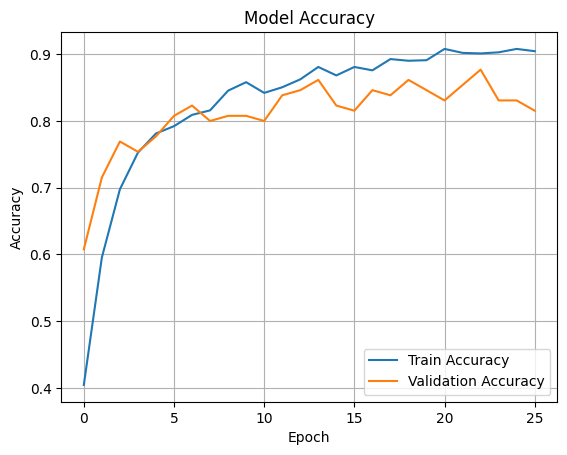

In [48]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

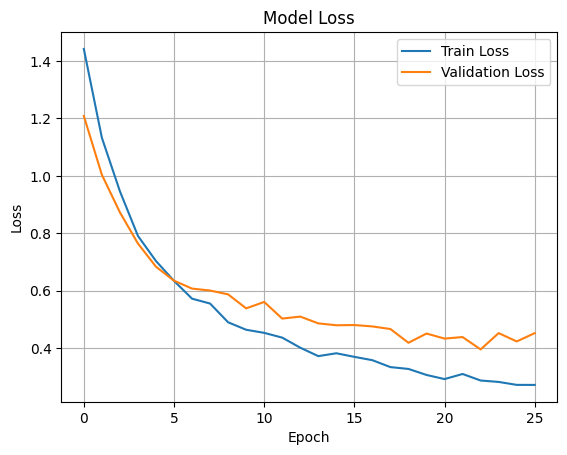

In [49]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


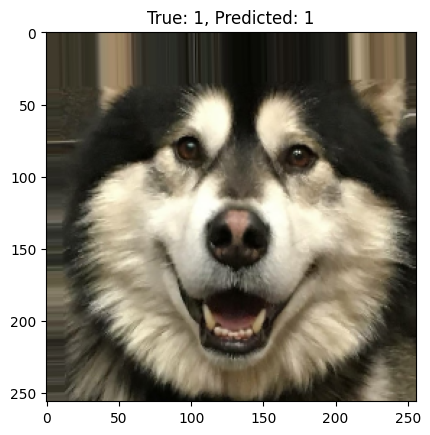

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x_val, y_val = next(validation_generator)

index = np.random.randint(0, len(x_val))
image = x_val[index]
true_label = np.argmax(y_val[index])

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(image)
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()